<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report

In [ ]:
# 샘플의 0은 많고 1은 적음 / 클래스 불균형 class imbalance
y = [0,0,0,0,0,0,0,0,0,1] #암환자 0:정상 (대부분), 1:환자(희소)
h1 = [0,0,0,0,0,0,0,0,0,0] #100% 정확할 순 없음
h2 = [0,0,0,0,0,0,1,1,1,1]

In [ ]:
len(y), len(h1)

(10, 10)

In [ ]:
accuracy_score(y, h1) #클래스 불균형시에는 정확도를 사용 불가, 대신 정밀도, 재현률 사용

0.9

In [ ]:
confusion_matrix(y, h1), precision_score(y, h1), recall_score(y, h1) 
#precision : 정밀도 (오탐지(잘못인식)) / 0을 1이라고 예측한 샘플중 맞은 비유
#recall : 재현률 (미탐지(놓침)) / 1을 찾아내는 능력

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([[9, 0],
        [1, 0]]), 0.0, 0.0)

In [ ]:
confusion_matrix(y, h2), precision_score(y, h2), recall_score(y, h2) ,accuracy_score(y, h2)

(array([[6, 3],
        [0, 1]]), 0.25, 1.0, 0.7)

In [ ]:
#f1 : 정밀도와 재현률의 조화평균
f1_score(y, h2)
#classification의 목표는 f1_score를 높이는 것


0.4

In [ ]:
print(classification_report(y, h1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adult dataset 분류
- target : 연간수입 > 5000만원

# groupby 안하고 target 잡았을 때
- target (<=50k) 넣었을때 = (0.7805282555282556, 0.7799889441680486) 
  - train이 test보다 성능 좋음
- target (<=50k) 안 4넣었을때 = (0.7770884520884521, 0.7761808242736933)
  - train이 test보다 성능 좋음
  - 넣었을 때가 더 성능 좋음


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [ ]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [ ]:
len(df['capital-gain'] == 0)

32561

In [ ]:
(df['capital-gain'] != 0).sum() #capital-gain (수익)이 0이 아닌 경우 / none이 아닌 경우

2712

In [ ]:
(df['capital-gain'] == 0).sum() #capital-gain (수익)이 0인 경우 / none인 경우

29849

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_hot = pd.get_dummies(df)
df_hot

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,target_ <=50K,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
df_hot['target_ >50K'].sum()

7841

In [ ]:
df_hot['target_ >50K'].unique()

array([0, 1], dtype=uint8)

In [ ]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
df_hot.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,target_ <=50K,target_ >50K
age,1.000000,-0.076646,0.036527,0.077674,5.777454e-02,0.068756,0.042627,0.051227,0.060901,-0.019362,-0.198388,0.102692,0.136252,0.012763,0.013995,-0.014504,-0.088314,-0.056016,0.039921,0.032076,0.102886,0.023014,-0.016196,-0.000434,0.010516,0.075787,0.019870,0.094761,0.012146,0.060651,-0.111262,0.129975,-0.011896,0.315679,0.016698,-0.534359,0.010210,0.265177,0.041323,-0.042902,...,0.003530,0.028501,-0.002903,-0.004170,-0.018643,0.009934,0.000840,0.003211,0.016691,-0.020041,-0.000833,-0.002674,-0.006938,-0.008963,0.015828,-0.002001,0.002231,-0.004228,0.027256,-0.010943,-0.001088,-0.006654,-0.055054,-0.011766,0.000202,-0.007522,0.004948,0.014285,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-1.505357e-02,0.000375,-0.234037,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-1.025171e-02,-0.018768,-0.002923,-0.007525,-0.002828,0.005031,0.042907,-0.024626,-0.039058,-0.010891,-0.003048,0.011479,0.009440,0.010250,0.033791,0.041094,-0.002290,0.015246,0.006358,-0.015643,-0.007240,-0.003307,-0.001566,-0.022229,0.017303,-0.005231,-0.005269,-0.014973,-0.000406,-0.026363,0.003634,0.037108,0.028467,-0.026246,-0.002598,0.007765,...,0.014278,0.028963,0.001016,-0.001089,0.034986,-0.003693,0.000643,-0.000279,-0.013100,0.031696,0.006706,-0.008500,0.012461,0.007651,-0.001759,-0.011169,-0.002607,-0.013324,-0.003635,0.010587,-0.001686,0.004753,0.134401,0.032100,0.002890,0.024796,-0.017536,-0.002391,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-1.139827e-02,0.005501,0.009463,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,7.992296e-02,0.148123,-0.077946,0.060518,0.097941,-0.015117,-0.118484,0.077358,0.016466,0.102589,-0.008136,-0.272428,-0.231692,-0.093890,-0.226199,-0.279766,-0.336268,-0.250106,0.137319,0.075232,0.503435,0.260786,-0.289817,0.360101,-0.139801,0.256600,-0.016845,-0.007771,0.000964,0.086078,-0.034223,-0.032109,-0.055152,-0.068044,-0.078766,0.004620,...,-0.011722,-0.010107,-0.053519,-0.007029,-0.071997,0.019040,0.025076,0.022859,-0.004138,-0.069852,-0.016427,-0.000174,-0.010785,0.005004,0.005349,0.050685,0.032717,0.000028,-0.022688,-0.004442,0.023001,-0.013942,-0.217666,-0.0172

In [ ]:
df_hot.corr()['target_ >50K'] # 나이, 모은 자산, 교육년수에 상관관계, / 이상하게 학사가 박사보다 상관관계 높음?

age                              0.234037
fnlwgt                          -0.009463
education-num                    0.335154
capital-gain                     0.223329
capital-loss                     0.150526
                                   ...   
native-country_ United-States    0.034470
native-country_ Vietnam         -0.017649
native-country_ Yugoslavia       0.006959
target_ <=50K                   -1.000000
target_ >50K                     1.000000
Name: target_ >50K, Length: 110, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5217e6828>,
      dtype=object)

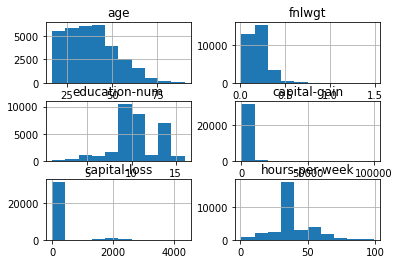

In [ ]:
df.hist()

In [ ]:
X = df_hot.drop(['target_ >50K','target_ <=50K'], axis = 1).astype(np.int)
Y = df_hot['target_ >50K'].astype(np.int)
X.shape, Y.shape

((32561, 108), (32561,))

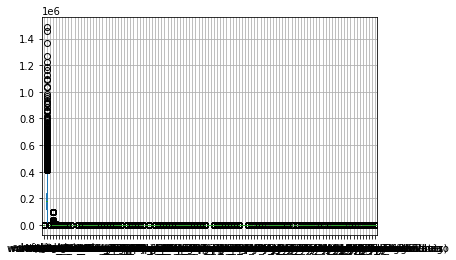

In [ ]:
# 정규화 값의 분포를 0~1사이, -1-1로 변환(압축)
X.boxplot()

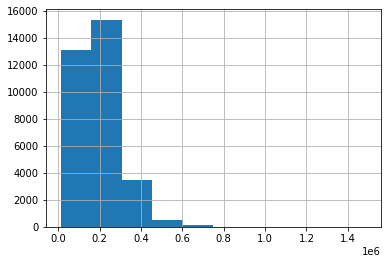

In [ ]:
X['fnlwgt'].hist()

In [ ]:
a = np.array([1,2,3,4,5])
(a-np.min(a))/(np.max(a)-np.min(a)) #정규 분포화 완료

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
X_norm = (X-np.min(X))/(np.max(X)-np.min(X)) #정규 분포화 완료

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.5, random_state=33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16280, 108), (16281, 108), (16280,), (16281,))

In [ ]:
model = SGDClassifier(max_iter =100000).fit(X_train, y_train) #데이터 정규화 -> 학습 안되는거 방지
model.score(X_train, y_train), model.score(X_test, y_test)

(0.851044226044226, 0.8460782507217002)

In [ ]:
(model.predict(X) > 2).sum()

0

In [ ]:
model.predict(X), Y.unique()

(array([1, 1, 1, ..., 1, 1, 1]), array([0, 1]))

In [ ]:
Y.unique()

array([0, 1])

In [ ]:
Y.sum()

7841

In [ ]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
type(Y), type(model.predict(X)) 

(pandas.core.series.Series, numpy.ndarray)

In [ ]:
model.predict(X) - Y #뺀 값이 255가 나왔는데 타입문제, uint8이어서 그런거였음 / .astype(np.int)로 변환하여 완료

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: target_ >50K, Length: 32561, dtype: int64

In [ ]:
np.abs(Y - model.predict(X)).sum()

24720

In [ ]:
np.abs(Y - model.predict(X)).sum()

24720

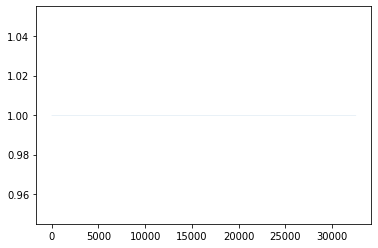

In [ ]:
plt.plot(model.predict(X), linewidth=0.1)

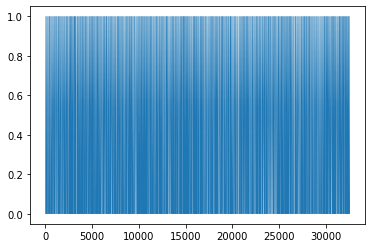

In [ ]:
plt.plot(Y, linewidth=0.1)

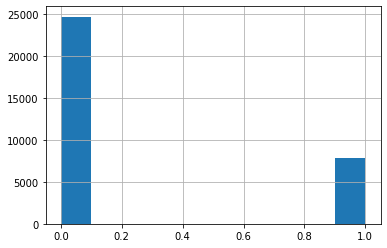

In [ ]:
Y.hist()

(array([    0.,     0.,     0.,     0.,     0., 32561.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

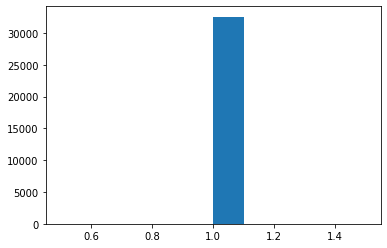

In [ ]:
plt.hist(model.predict(X))

In [ ]:
accuracy_score(model.predict(X), Y)

0.2408095574460244

In [ ]:
print(confusion_matrix(model.predict(X), Y), precision_score(model.predict(X), Y), recall_score(model.predict(X), Y))
#

[[    0     0]
 [24720  7841]] 1.0 0.2408095574460244


In [ ]:
print(classification_report(Y, model.predict(X))) #2진분류 binary classification
# 세금징수

#TN 서민한테 세금 안걷음
#FN 서민한테 세금 걷음
#FP 부자한테 세금 안걷음
#TP 부자한테 세금 걷음

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24720
           1       0.24      1.00      0.39      7841

    accuracy                           0.24     32561
   macro avg       0.12      0.50      0.19     32561
weighted avg       0.06      0.24      0.09     32561



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 유방암 검사
- groupby 안해줬을 경우, 1_B를 제외 안했을 경우,
  - (0.9119718309859155, 0.9263157894736842)
- groupby 안해줬을 경우, 1_B를 제외 했을 경우
  - (0.9084507042253521, 0.9263157894736842)

- 정규분포화 했을 경우
  - 제외 = (0.9612676056338029, 0.968421052631579)
  - 제외 안함 = 1
    - ??


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header = None)
df = df.drop(0, axis = 1)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       569 non-null    object 
 1   2       569 non-null    float64
 2   3       569 non-null    float64
 3   4       569 non-null    float64
 4   5       569 non-null    float64
 5   6       569 non-null    float64
 6   7       569 non-null    float64
 7   8       569 non-null    float64
 8   9       569 non-null    float64
 9   10      569 non-null    float64
 10  11      569 non-null    float64
 11  12      569 non-null    float64
 12  13      569 non-null    float64
 13  14      569 non-null    float64
 14  15      569 non-null    float64
 15  16      569 non-null    float64
 16  17      569 non-null    float64
 17  18      569 non-null    float64
 18  19      569 non-null    float64
 19  20      569 non-null    float64
 20  21      569 non-null    float64
 21  22      569 non-null    float64
 22  23

In [ ]:
df_hot = pd.get_dummies(df)
df_hot

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,1_B,1_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [ ]:
df_hot.corr()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,1_B,1_M
2,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029,0.730029
3,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185,0.415185
4,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636,0.742636
5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984,0.708984
6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560,0.358560
7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534,0.596534
8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360,0.696360
9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614,0.776614
10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499,0.330499
11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838,-0.012838


In [ ]:
(df_hot['1_M']).mean() # 유방암 환자=37%

0.37258347978910367

In [ ]:
X = df_hot.drop(['1_M','1_B'], axis=1)
Y = df_hot['1_M']
X.shape, Y.shape

((569, 30), (569,))

In [ ]:
X_norm = (X - X.min()) / (X.max() - X.min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.5, random_state=33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((284, 30), (285, 30), (284,), (285,))

In [ ]:
model = SGDClassifier(alpha=0.0001, max_iter=10000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9612676056338029, 0.968421052631579)

In [ ]:
h = model.predict(X_norm)

In [ ]:
print(classification_report(Y,h))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       357
           1       1.00      0.91      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.95      0.96       569
weighted avg       0.97      0.96      0.96       569



# 헝가리 심장병
- 정규분표X : (0.7346938775510204, 0.7551020408163265)
- 정규분표 : (0.9659863945578231, 0.9523809523809523)


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data'
df = pd.read_csv(url,sep=' ', header=None)
df['target'] = (df[13]>0).values.astype(np.int)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0,0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0,1
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0,0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0,1
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0,0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0,0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0,0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0,0


In [ ]:
df.isna().sum()


0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
target    0
dtype: int64

In [ ]:
df = df.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff51f929c50>,
      dtype=object)

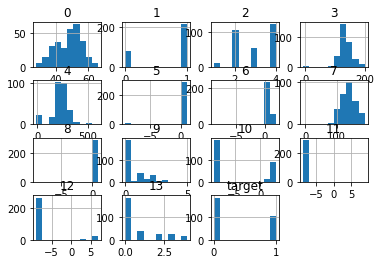

In [ ]:
df.hist()

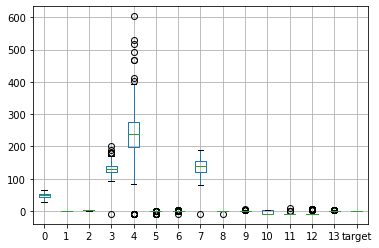

In [ ]:
df.boxplot()

In [ ]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1.000000,0.013618,0.145826,0.221426,0.043823,0.045156,-0.007075,-0.431760,0.153487,0.177707,0.231982,0.036594,0.007574,0.209943,0.159315
1,0.013618,1.000000,0.249875,0.120553,0.032543,0.089885,-0.095346,-0.071843,0.171988,0.118931,0.046960,-0.030899,0.014007,0.223137,0.272781
2,0.145826,0.249875,1.000000,0.102703,0.116659,0.002631,0.079637,-0.326630,0.364736,0.353109,0.375378,0.071015,0.075870,0.428710,0.505864
3,0.221426,0.120553,0.102703,1.000000,0.017187,0.062097,-0.037373,-0.010890,0.449249,0.147793,0.132032,0.056565,-0.028356,0.212381,0.144997
4,0.043823,0.032543,0.116659,0.017187,1.000000,-0.110804,0.031461,-0.091646,0.074548,0.133803,0.165220,-0.073019,0.067039,0.220973,0.201380
5,0.045156,0.089885,0.002631,0.062097,-0.110804,1.000000,-0.007308,-0.001221,0.019679,0.048783,0.001480,0.013102,-0.092170,0.097908,0.065060
6,-0.007075,-0.095346,0.079637,-0.037373,0.031461,-0.007308,1.000000,-0.014887,-0.013332,0.056091,0.045302,-0.029367,-0.007458,-0.049083,-0.078518
7,-0.431760,-0.071843,-0.326630,-0.010890,-0.091646,-0.001221,-0.014887,1.000000,0.018734,-0.314669,-0.345783,-0.031113,0.006010,-0.333257,-0.295711
8,0.153487,0.171988,0.364736,0.449249,0.074548,0.019679,-0.013332,0.018734,1.000000,0.337526,0.391197,0.051208,0.059168,0.397985,0.410591
9,0.177707,0.118931,0.353109,0.147793,0.133803,0.048783,0.056091,-0.314669,0.337526,1.000000,0.843638,0.013930,-0.001978,0.581325,0.545700


In [ ]:
X = df.drop('target',axis=1)
y = df['target']
X.shape, y.shape

((294, 14), (294,))

In [ ]:
X_norm = (X - X.min())/(X.max()-X.min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((147, 14), (147, 14), (147,), (147,))

In [ ]:
model = SGDClassifier().fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9659863945578231, 0.9523809523809523)

# 은행 담보대출
- 정규분포 X, duration, y_no 제외X 
  - default
    - (0.8402654867256637, 0.8425475453339231)
  - duration 제외
    - (0.8252212389380531, 0.8288367978770456)
  - duration, y_no 제외
    - (0.8309734513274336, 0.8367978770455551)

- 정규분포 0, duration, y_no 제외
  - default
    - 1
  - duration 제외
    - 1
  - duration, y_no 제외
    - (0.8845132743362832, 0.9013710747456878)



In [ ]:
df = pd.read_csv('bank.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff51ec89e80>,
      dtype=object)

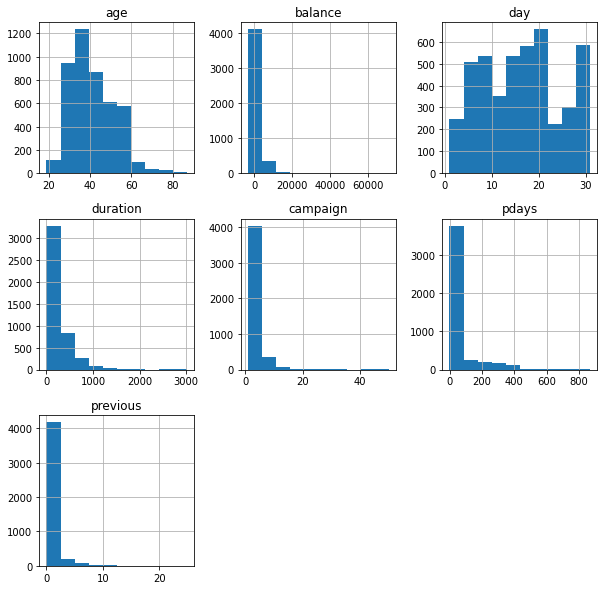

In [ ]:
df.hist(figsize=(10,10))

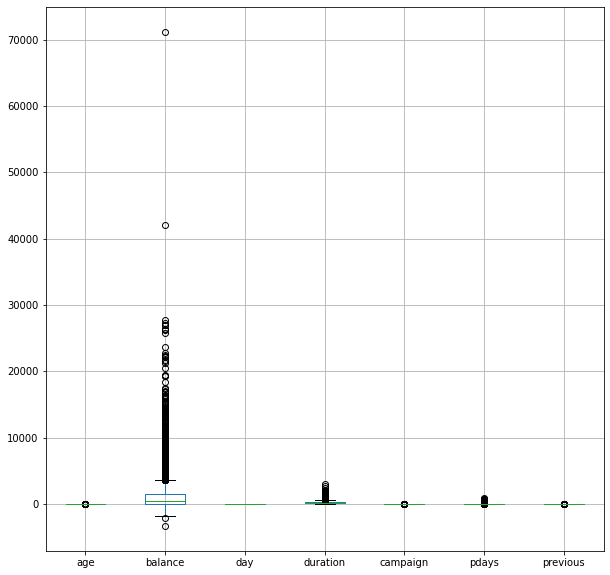

In [ ]:
df.boxplot(figsize=(10,10))

In [ ]:
df_hot = pd.get_dummies(df)
df_hot

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4518,57,295,19,151,11,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4519,28,1137,6,129,4,211,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
df_hot = df_hot.astype(np.int)

In [ ]:
df_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   job_admin.           4521 non-null   int64
 8   job_blue-collar      4521 non-null   int64
 9   job_entrepreneur     4521 non-null   int64
 10  job_housemaid        4521 non-null   int64
 11  job_management       4521 non-null   int64
 12  job_retired          4521 non-null   int64
 13  job_self-employed    4521 non-null   int64
 14  job_services         4521 non-null   int64
 15  job_student          4521 non-null   int64
 16  job_technician       452

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff51dc27e10>,
      dtype=object)

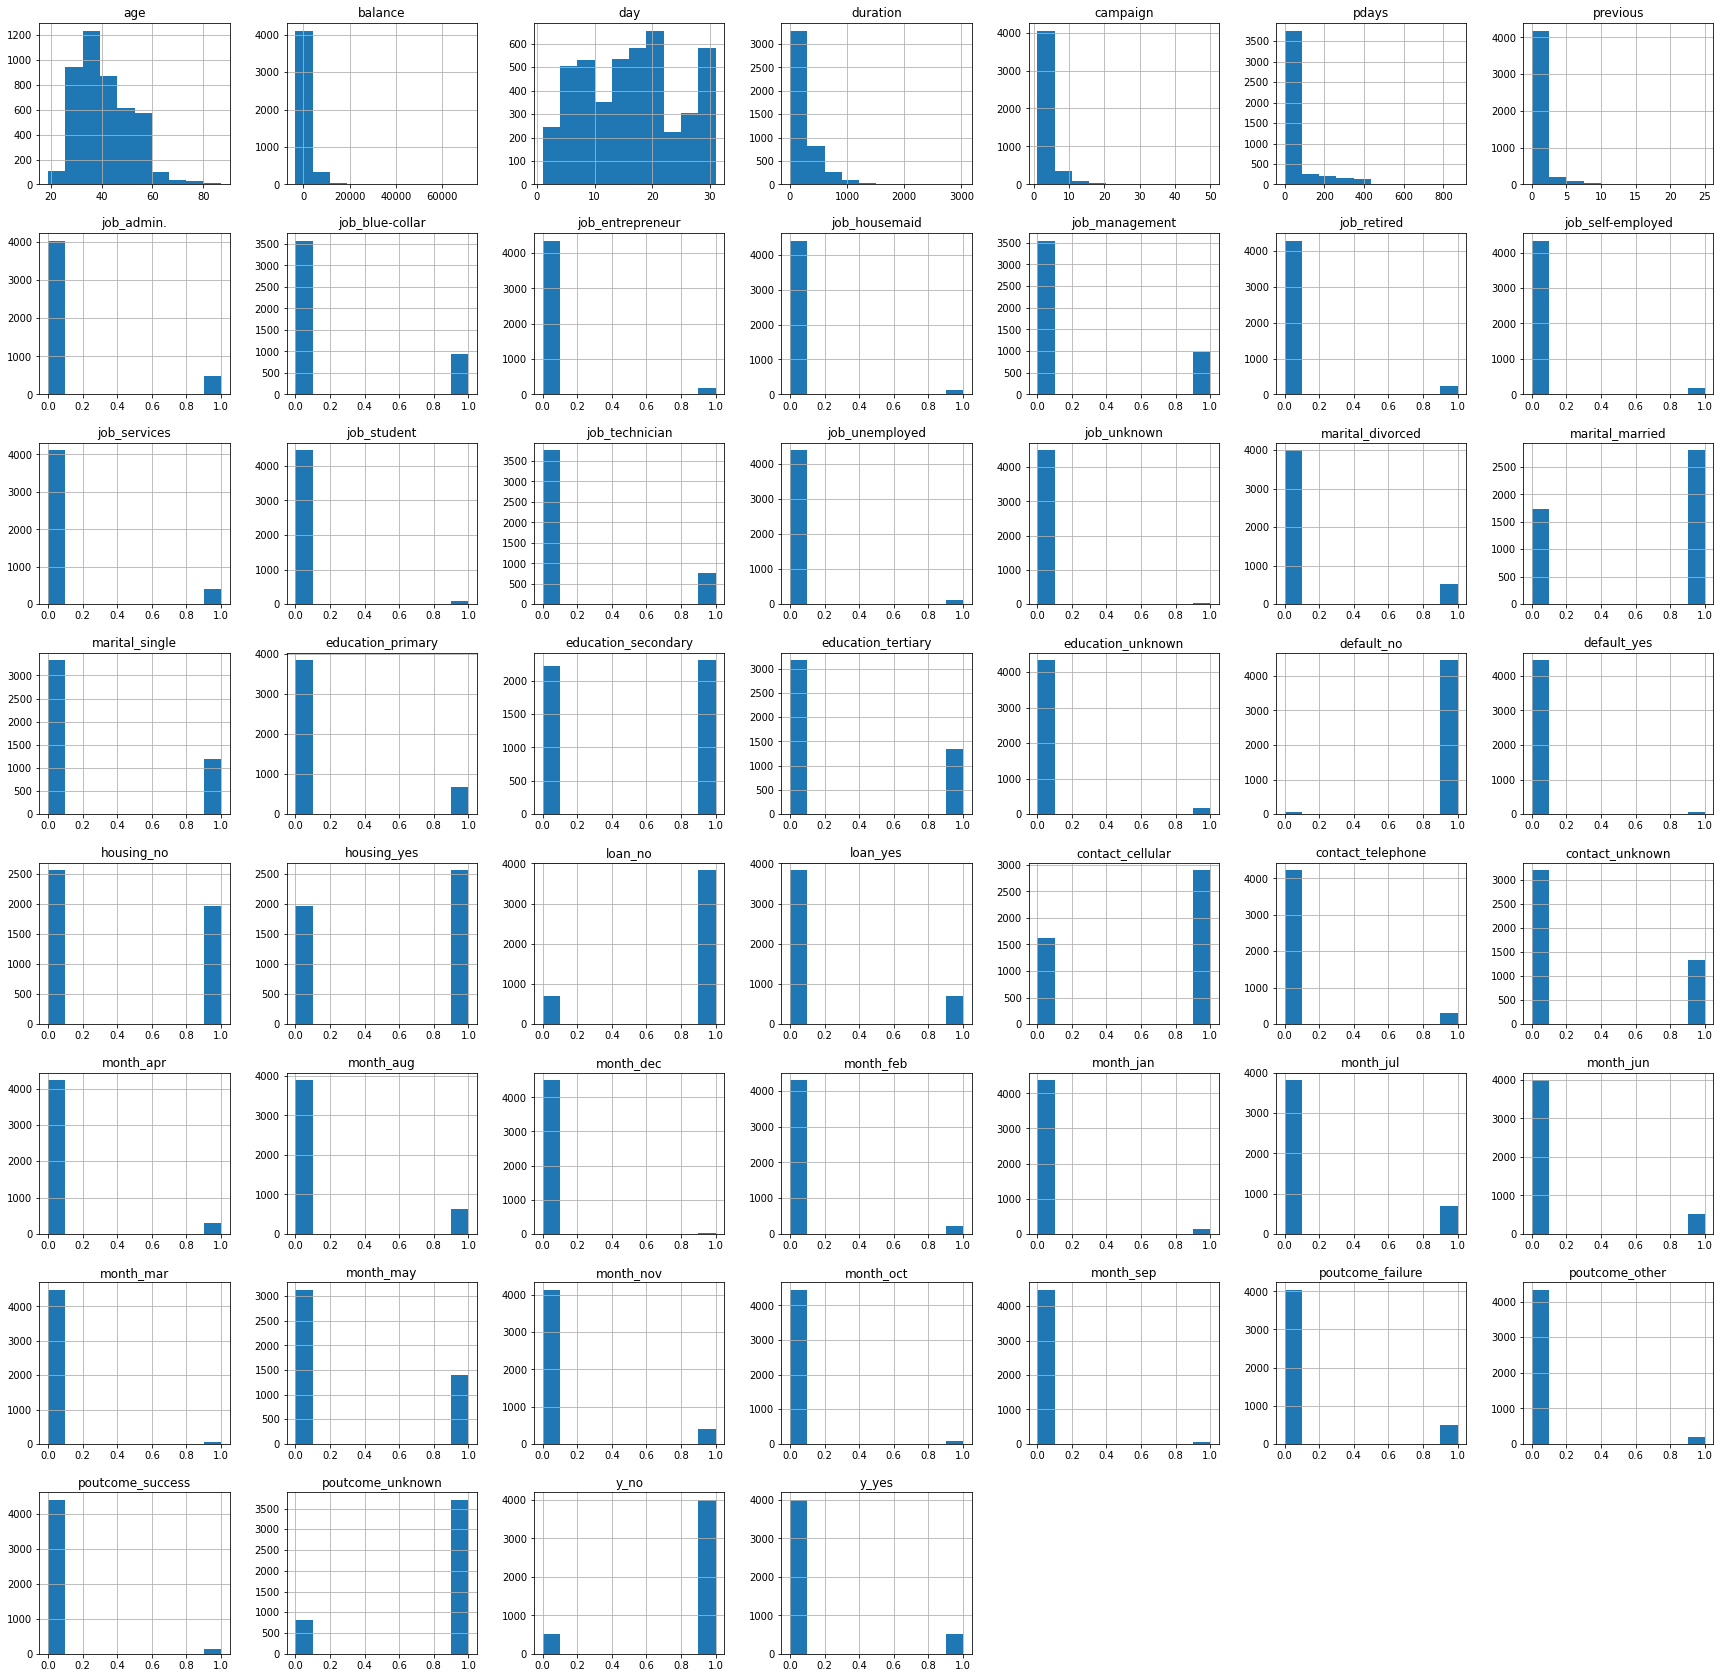

In [ ]:
df_hot.hist(figsize = (30,30))

In [ ]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [ ]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


In [ ]:
df_hot.corr()['y_yes']

In [ ]:
df_hot.corr().hist(figsize=(30,30))

In [ ]:
df_hot['y_yes'].mean()

0.11523999115239991

In [ ]:
X = df_hot.drop(['y_yes','duration','y_no'], axis=1)
y = df_hot['y_yes']
X = (X-X.min())/(X.max()-X.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2260, 50), (2261, 50), (2260,), (2261,))

In [ ]:
model = SGDClassifier().fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8858407079646018, 0.901813356921716)

In [ ]:
print(classification_report(y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.65      0.17      0.27       521

    accuracy                           0.89      4521
   macro avg       0.78      0.58      0.60      4521
weighted avg       0.87      0.89      0.86      4521



In [ ]:
model.coef_

array([[ 1.64021546e-01, -1.02305360e+00, -1.81517177e-01,
        -1.13409183e+00, -8.70518021e-02, -5.79980186e-01,
         2.62434473e-01, -6.56086183e-02, -1.96825855e-01,
         1.96825855e-01,  6.56086183e-02,  2.62434473e-01,
        -1.31217237e-01, -6.56086183e-02,  3.28043092e-01,
        -1.96825855e-01, -6.56086183e-02,  4.59260328e-01,
         3.28043092e-01,  1.96825855e-01,  3.28043092e-01,
         3.28043092e-01,  2.62434473e-01,  1.96825855e-01,
         6.56086183e-02,  3.28043092e-01,  5.24868947e-01,
         4.59260328e-01,  3.93651710e-01,  5.24868947e-01,
         3.28043092e-01,  5.90477565e-01,  2.62434473e-01,
        -3.15519266e-15,  6.56086183e-02,  1.31217237e-01,
        -1.04784996e-16, -1.31217237e-01, -3.93651710e-01,
        -1.31217237e-01,  1.96825855e-01,  6.56086183e-01,
        -6.56086183e-02, -3.28043092e-01,  1.04973789e+00,
        -1.96825855e-01, -3.28043092e-01, -6.56086183e-02,
         1.90264993e+00, -6.56086183e-01]])

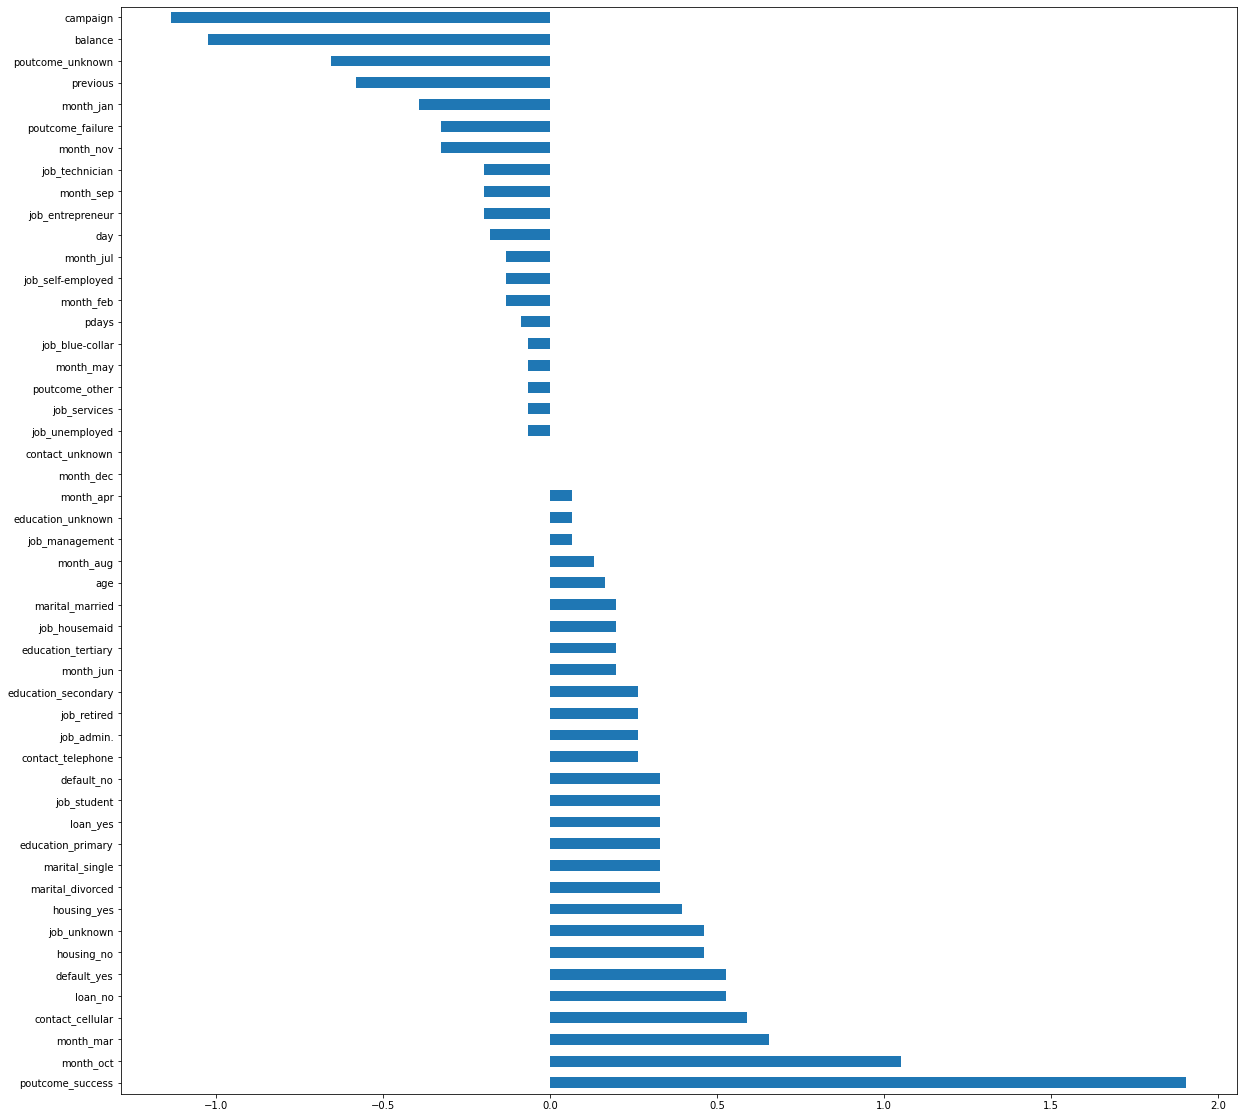

In [ ]:
pd.Series(np.squeeze(model.coef_), X.columns).sort_values().iloc[::-1].plot.barh(figsize=(20,20))

# 은행 데이터 
- 카드 바꿀것 같은 사람들 찾기
- 어떤 사람들이 카드를 바꾸나요??

- 정규분포 안했을시 
  - (0.8396207781947462, 0.8390600315955766)
- 정규분포 했을시
  - (0.9049970373296464, 0.9038309636650869)


In [ ]:
df = pd.read_csv('BankChurners.csv')
df = df.set_index('CLIENTNUM')
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118


In [ ]:
df.isna().sum()

Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                                                                                                       0
Card_Category                                   

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Attrition_Flag                                                                                                                      10127 non-null  object 
 1   Customer_Age                                                                                                                        10127 non-null  int64  
 2   Gender                                                                                                                              10127 non-null  object 
 3   Dependent_count                                                      

In [ ]:
df.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000267,0.000267
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235,-0.131207,0.131207


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff508fe0a90>,
      dtype=object)

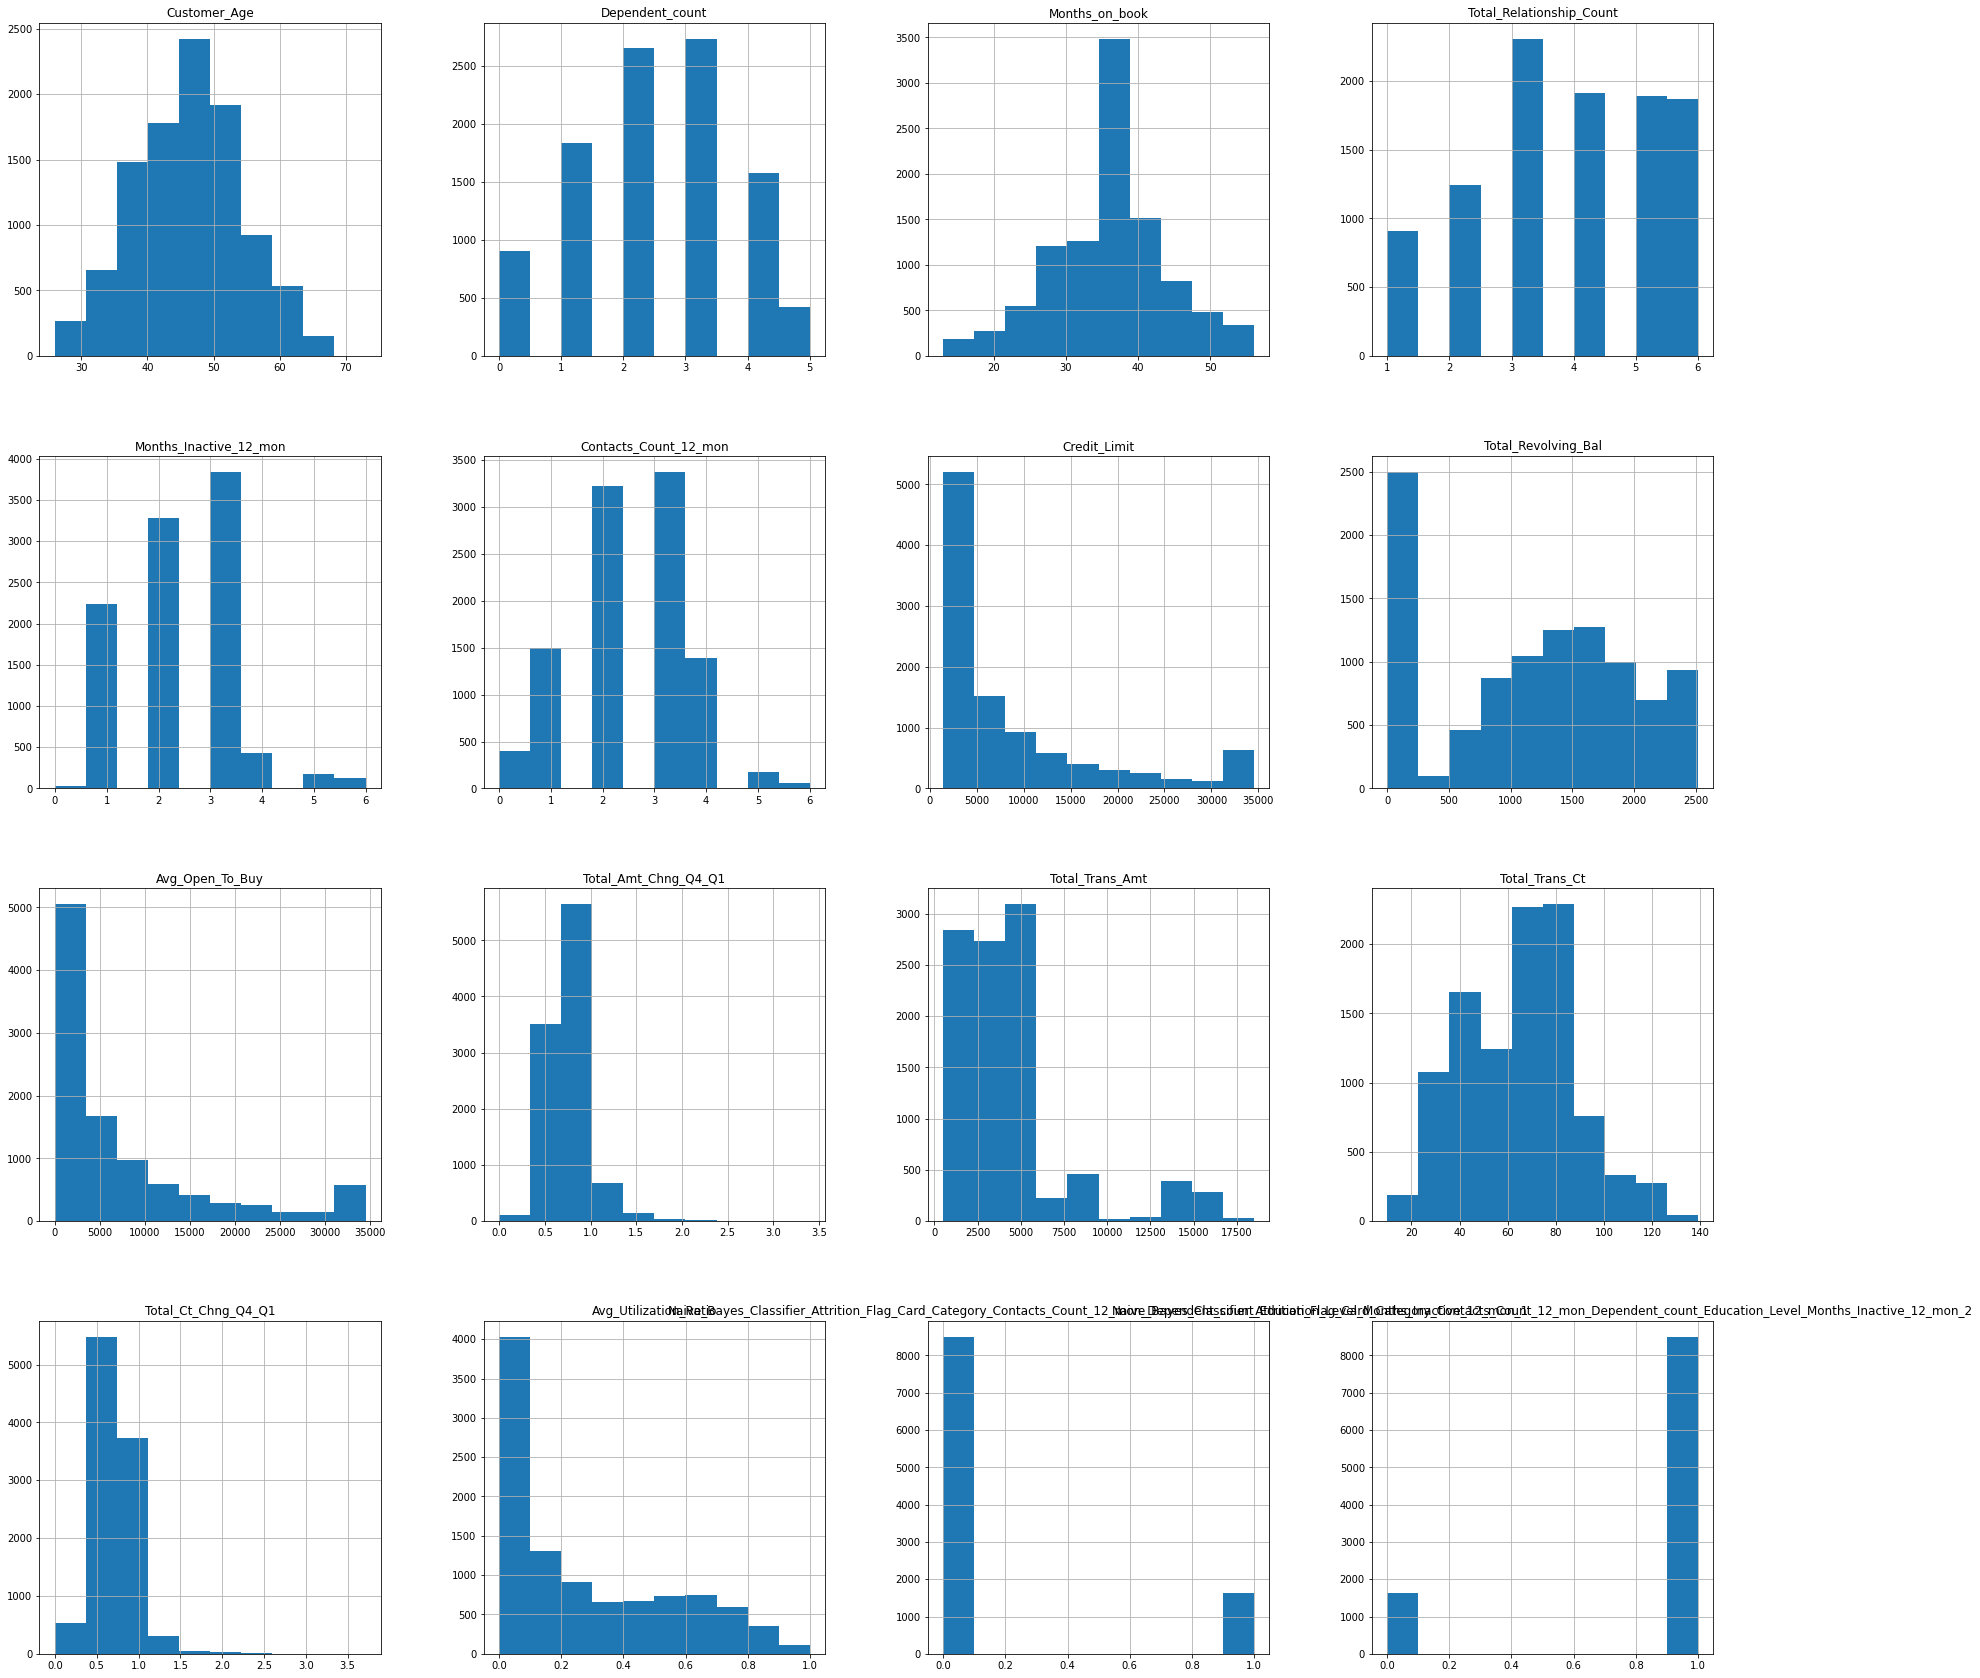

In [ ]:
# target = 'Attrition_Flag
df.hist(figsize = (30,30))

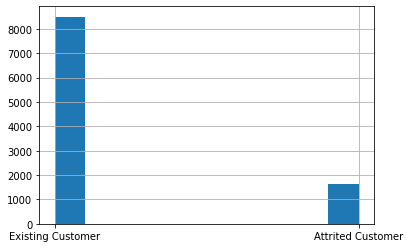

In [ ]:
df['Attrition_Flag'].hist()

In [ ]:
d = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1' : 'inactive_12_mon_1',
     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2' : 'Inactive_12_mon_2'}
df = df.rename(columns=d)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [ ]:
df = pd.get_dummies(df)
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,inactive_12_mon_1,Inactive_12_mon_2,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
710638233,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
716506083,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
df.corr()['Attrition_Flag_Attrited Customer'].sort_values()

Attrition_Flag_Existing Customer   -1.000000
Inactive_12_mon_2                  -0.999989
Total_Trans_Ct                     -0.371403
Total_Ct_Chng_Q4_Q1                -0.290054
Total_Revolving_Bal                -0.263053
Avg_Utilization_Ratio              -0.178410
Total_Trans_Amt                    -0.168598
Total_Relationship_Count           -0.150005
Total_Amt_Chng_Q4_Q1               -0.131063
Gender_M                           -0.037272
Income_Category_$60K - $80K        -0.028221
Credit_Limit                       -0.023873
Marital_Status_Married             -0.023735
Education_Level_High School        -0.011730
Income_Category_$40K - $60K        -0.011688
Education_Level_Graduate           -0.009046
Card_Category_Silver               -0.008467
Education_Level_College            -0.007840
Income_Category_$80K - $120K       -0.003459
Education_Level_Uneducated         -0.001444
Avg_Open_To_Buy                    -0.000285
Marital_Status_Divorced             0.000850
Card_Categ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5081a4a58>,
      dtype=object)

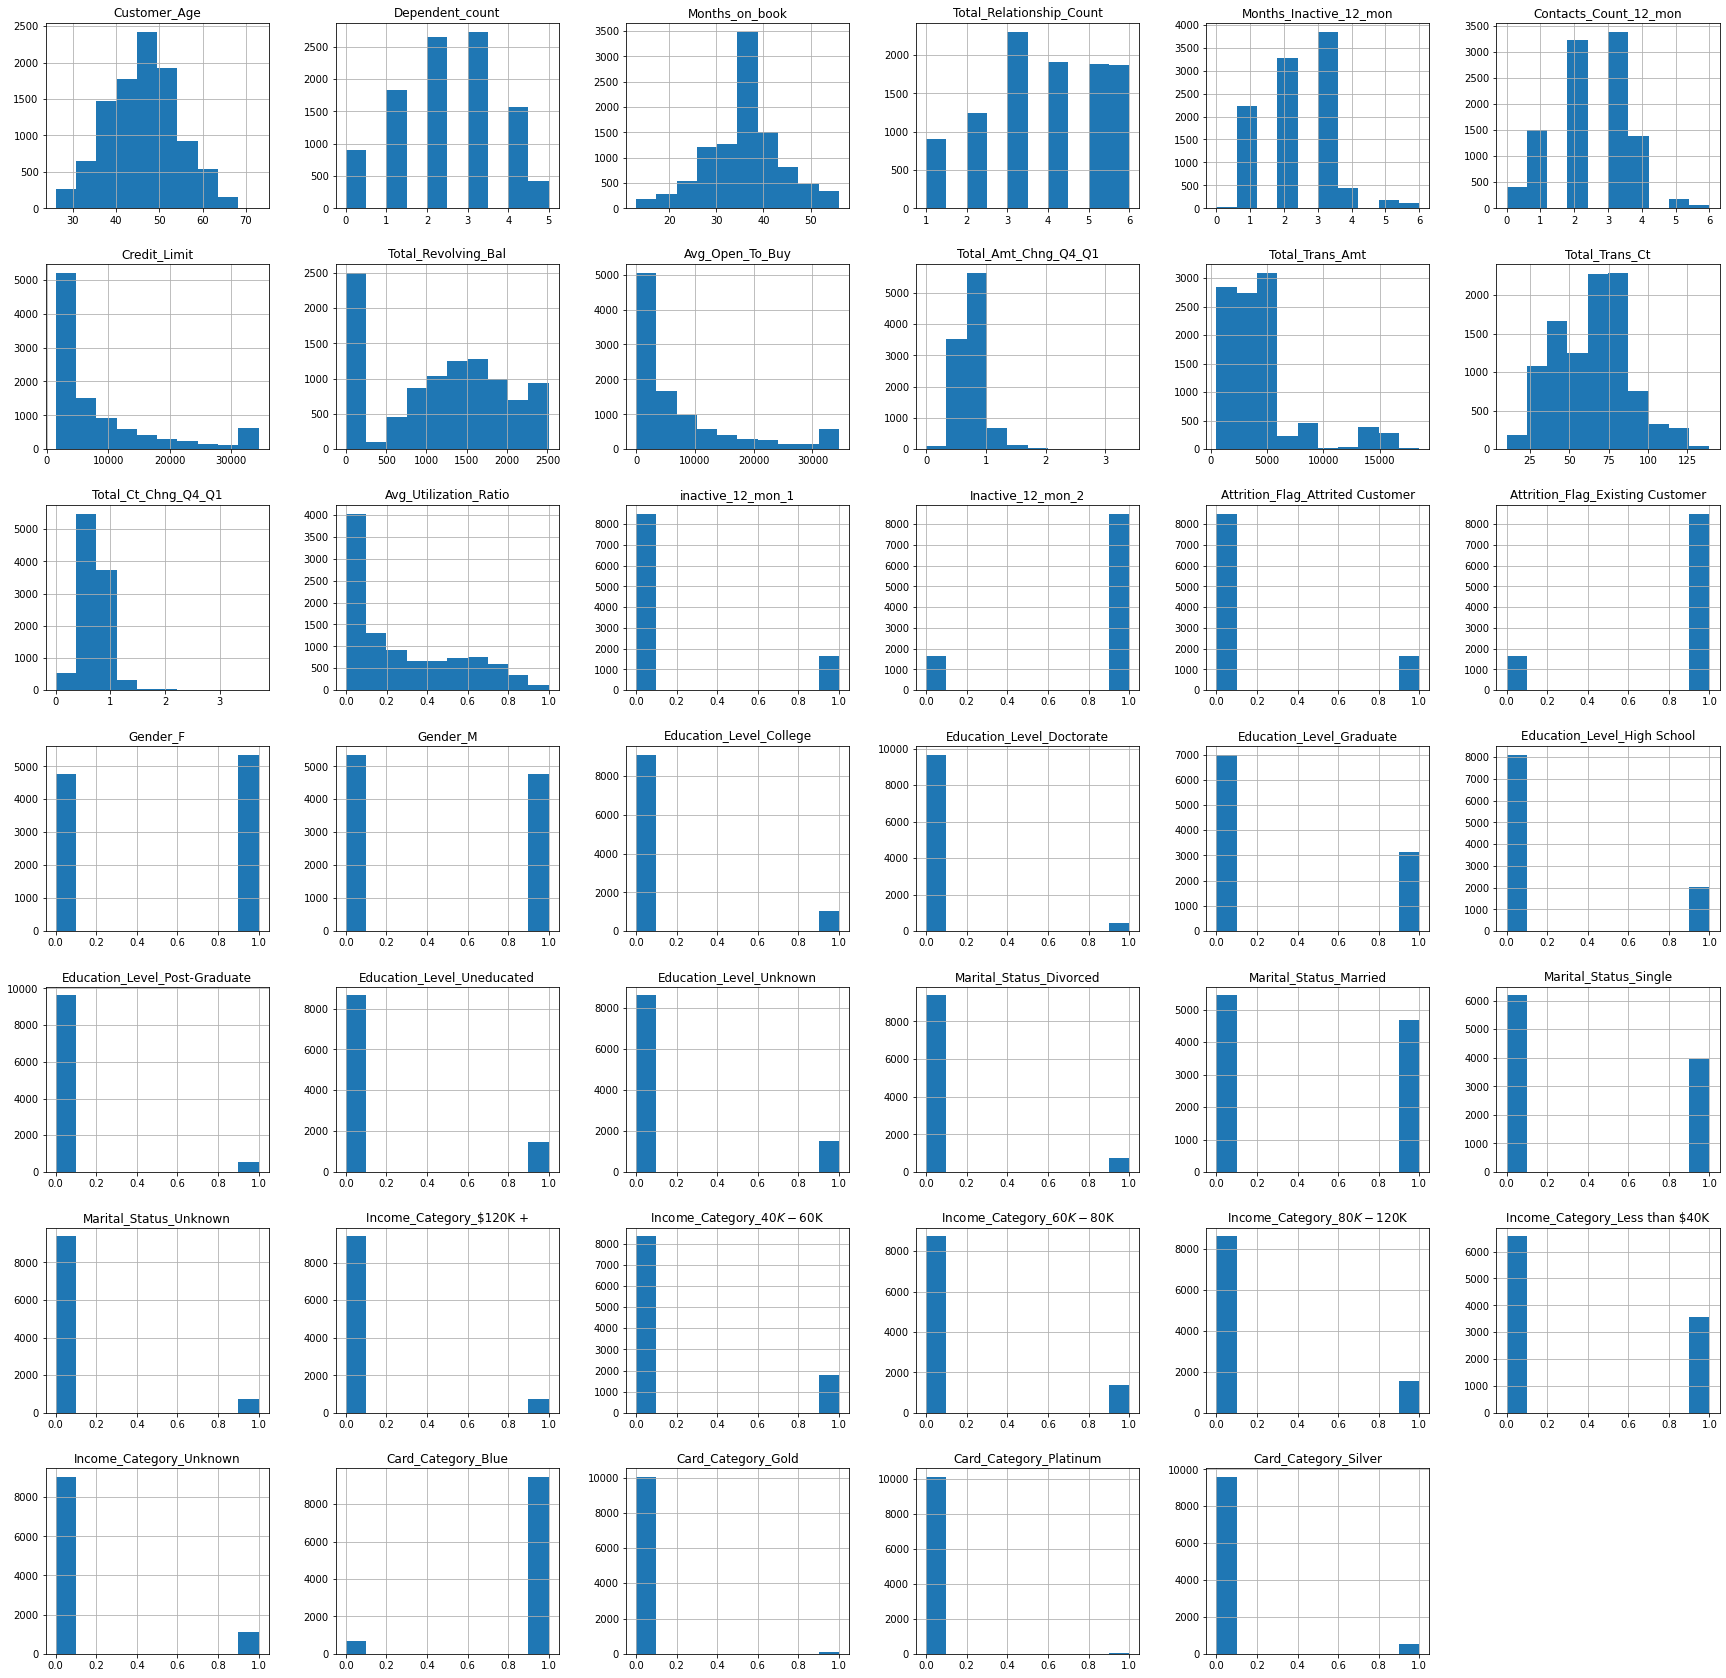

In [ ]:
df.hist(figsize=(30,30))

In [ ]:
X = df.drop(['Attrition_Flag_Attrited Customer','inactive_12_mon_1','Inactive_12_mon_2','Attrition_Flag_Existing Customer'], axis = 1)
Y = df['Attrition_Flag_Attrited Customer']
X.shape, Y.shape

((10127, 37), (10127,))

In [ ]:
X_norm = (X-X.min())/(X.max()-X.min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5063, 37), (5064, 37), (5063,), (5064,))

In [ ]:
model = SGDClassifier().fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.901244321548489, 0.8983017377567141)

In [ ]:
df['Attrition_Flag_Attrited Customer'].mean()

0.1606596227905599

In [ ]:
confusion_matrix(Y,model.predict(X_norm))

array([[8060,  440],
       [ 575, 1052]])

In [ ]:
print(classification_report(Y,model.predict(X_norm)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8500
           1       0.71      0.65      0.67      1627

    accuracy                           0.90     10127
   macro avg       0.82      0.80      0.81     10127
weighted avg       0.90      0.90      0.90     10127



In [ ]:
h = model.predict(X_test)
h

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
X_test[h>0].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,0.438866,0.495095,0.539319,0.433787,0.458901,0.506812,0.165890,0.200926,0.185925,0.199293,0.118597,0.242697,0.139656,0.133957,0.700272,0.299728,0.096730,0.066757,0.275204,0.178474,0.050409,0.167575,0.164850,0.074932,0.401907,0.435967,0.087193,0.061308,0.207084,0.073569,0.099455,0.412807,0.145777,0.950954,0.014986,0.004087,0.029973
std,0.171999,0.252794,0.182400,0.295953,0.158911,0.177221,0.234941,0.287179,0.225124,0.065047,0.125556,0.115638,0.055889,0.226919,0.458451,0.458451,0.295792,0.249772,0.446922,0.383172,0.218936,0.373743,0.371298,0.263461,0.490618,0.496221,0.282311,0.240058,0.405493,0.261247,0.299476,0.492674,0.353123,0.216112,0.121581,0.063844,0.170628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319149,0.400000,0.441860,0.200000,0.333333,0.333333,0.015787,0.000000,0.046729,0.154548,0.052715,0.170543,0.102585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.425532,0.600000,0.534884,0.400000,0.500000,0.500000,0.068768,0.000000,0.095645,0.199293,0.088934,0.232558,0.134626,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.574468,0.600000,0.651163,0.600000,0.500000,0.666667,0.202816,0.377235,0.225169,0.243671,0.115486,0.286822,0.175013,0.196196,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,0.893617,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.442744,0.902804,0.744186,0.422994,0.992993,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test[h>0].describe().loc[['count','mean']]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.00000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.00000,734.000000,734.000000,734.000000,734.000000,734.000000,734.00000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,0.438866,0.495095,0.539319,0.433787,0.458901,0.506812,0.16589,0.200926,0.185925,0.199293,0.118597,0.242697,0.139656,0.133957,0.700272,0.299728,0.09673,0.066757,0.275204,0.178474,0.050409,0.167575,0.16485,0.074932,0.401907,0.435967,0.087193,0.061308,0.207084,0.073569,0.099455,0.412807,0.145777,0.950954,0.014986,0.004087,0.029973


In [ ]:
df.corr()['Attrition_Flag_Attrited Customer'].sort_values()

Attrition_Flag_Existing Customer   -1.000000
Inactive_12_mon_2                  -0.999989
Total_Trans_Ct                     -0.371403
Total_Ct_Chng_Q4_Q1                -0.290054
Total_Revolving_Bal                -0.263053
Avg_Utilization_Ratio              -0.178410
Total_Trans_Amt                    -0.168598
Total_Relationship_Count           -0.150005
Total_Amt_Chng_Q4_Q1               -0.131063
Gender_M                           -0.037272
Income_Category_$60K - $80K        -0.028221
Credit_Limit                       -0.023873
Marital_Status_Married             -0.023735
Education_Level_High School        -0.011730
Income_Category_$40K - $60K        -0.011688
Education_Level_Graduate           -0.009046
Card_Category_Silver               -0.008467
Education_Level_College            -0.007840
Income_Category_$80K - $120K       -0.003459
Education_Level_Uneducated         -0.001444
Avg_Open_To_Buy                    -0.000285
Marital_Status_Divorced             0.000850
Card_Categ